# **Coronavirus (Covid-19) Data in the United States**
   
    “Data from The New York Times, based on reports from state and local health agencies.”

**1.   Mask-Wearing Survey Data:** Data on the estimated prevalence of mask-wearing in counties in the United States. The fields have the following definitions:

* **COUNTYFP:** The county FIPS code.
* **NEVER:** The estimated share of people in this county who would say never in response to the question “How often do you wear a mask in public when you expect to be within six feet of another person?”
* **RARELY:** The estimated share of people in this county who would say rarely
* **SOMETIMES:** The estimated share of people in this county who would say sometimes
* **FREQUENTLY:** The estimated share of people in this county who would say frequently
* **ALWAYS:** The estimated share of people in this county who would say always

    
    “Estimates from The New York Times, based on roughly 250,000 interviews conducted by Dynata from July 2 to July 14.”

Link: https://github.com/nytimes/covid-19-data


In [ ]:
#import libraries
import pandas as pd
import numpy as np
from google.colab import files
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#download file from github
df_mask = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/mask-use/mask-use-by-county.csv")

In [ ]:
df_mask.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459


In [ ]:
df_mask.tail()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
3137,56037,0.061,0.295,0.230,0.146,0.268
3138,56039,0.095,0.157,0.160,0.247,0.340
3139,56041,0.098,0.278,0.154,0.207,0.264
3140,56043,0.204,0.155,0.069,0.285,0.287
3141,56045,0.142,0.129,0.148,0.207,0.374


In [ ]:
df_mask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   COUNTYFP    3142 non-null   int64  
 1   NEVER       3142 non-null   float64
 2   RARELY      3142 non-null   float64
 3   SOMETIMES   3142 non-null   float64
 4   FREQUENTLY  3142 non-null   float64
 5   ALWAYS      3142 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 147.4 KB


In [ ]:
# saving the dataframe to working directory without index
df_mask.to_csv('US_MaskSurvey_CovidData.csv', index=False)

In [ ]:
select_col = ['ALWAYS', 'NEVER']
df_nvr_alwys = df_mask[select_col]
df_nvr_alwys.head()

,ALWAYS,NEVER
0,0.444,0.053
1,0.436,0.083
2,0.491,0.067
3,0.572,0.020
4,0.459,0.053


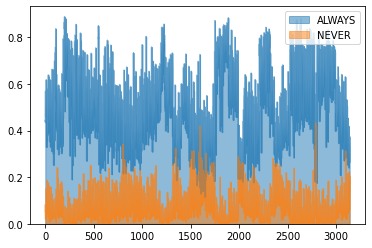

In [ ]:
#plot for NEVER, ALWAYS
df_nvr_alwys.plot.area(stacked=False);

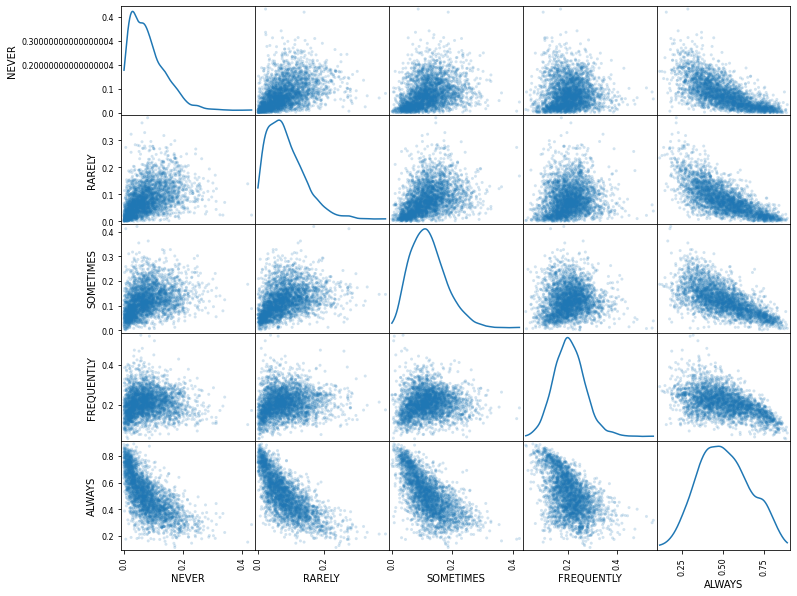

In [ ]:
#plot for NEVER,	RARELY,	SOMETIMES,	FREQUENTLY,	ALWAYS
from pandas.plotting import scatter_matrix
scatter_matrix(df_mask.iloc[:, 1:], alpha=0.2, figsize=(12, 10), diagonal="kde");

**2.   Historical Data:**  A series of data files with cumulative counts of coronavirus cases in the United States, at the state and county level, over time (released by The New York Times).

* U.S. National-Level Data
* State-Level Data
* County-Level Data


    State and county files contain FIPS codes, a standard geographic identifier

**a) U.S. National-Level Data**

In [ ]:
#download file from github
df_national = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv")

In [ ]:
df_national.head()

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


In [ ]:
df_national.tail()

,date,cases,deaths
451,2021-04-16,31596391,565769
452,2021-04-17,31649287,566446
453,2021-04-18,31690899,566804
454,2021-04-19,31761236,567287
455,2021-04-20,31820191,568083


In [ ]:
#check data type and non-null values
df_national.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    456 non-null    object
 1   cases   456 non-null    int64 
 2   deaths  456 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.8+ KB


In [ ]:
# saving the dataframe to working directory without index
df_national.to_csv('US_NationalLevel_CovidData.csv', index=False)

In [ ]:
#convert date from string to datetime
df_national['date'] = pd.to_datetime(df_national['date'])

**Mar 2019 - Mar 2021**

In [ ]:
df_national_mar20_mar21 = df_national[(df_national['date']>='2019-03-01') & (df_national['date']<='2021-03-31')]

In [ ]:
df_national_mar20_mar21

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
431,2021-03-27,30239205,548380
432,2021-03-28,30284115,548867
433,2021-03-29,30354909,549552
434,2021-03-30,30416970,550500


In [ ]:
#check data type and non-null values
df_national_mar20_mar21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 0 to 435
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    436 non-null    datetime64[ns]
 1   cases   436 non-null    int64         
 2   deaths  436 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 13.6 KB


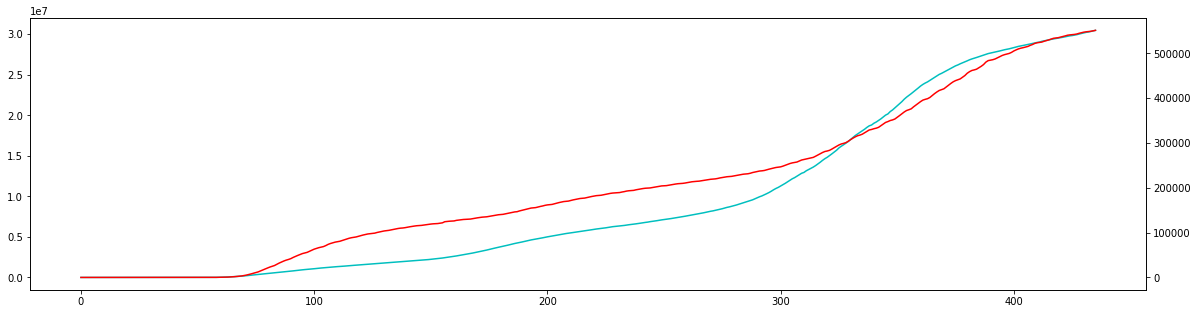

In [ ]:
#plot 'cases' and 'deaths'
plt.figure(figsize=(20,5))
df_national_mar20_mar21["cases"].plot(style='c');
df_national_mar20_mar21["deaths"].plot(secondary_y=True, style='r');

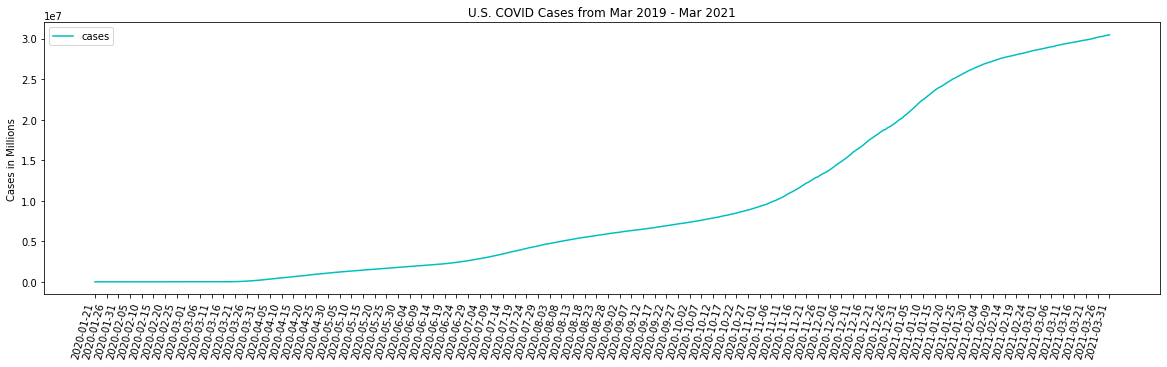

In [ ]:
#plot for cases vs date
plt.figure(figsize=(20,5))
plt.plot('date', 'cases', data=df_national_mar20_mar21, color='c')
plt.xticks(df_national_mar20_mar21['date'][::5], rotation=75, ha='right')
plt.ylabel('Cases in Millions')
plt.legend()
plt.title('U.S. COVID Cases from Mar 2019 - Mar 2021')
plt.show()

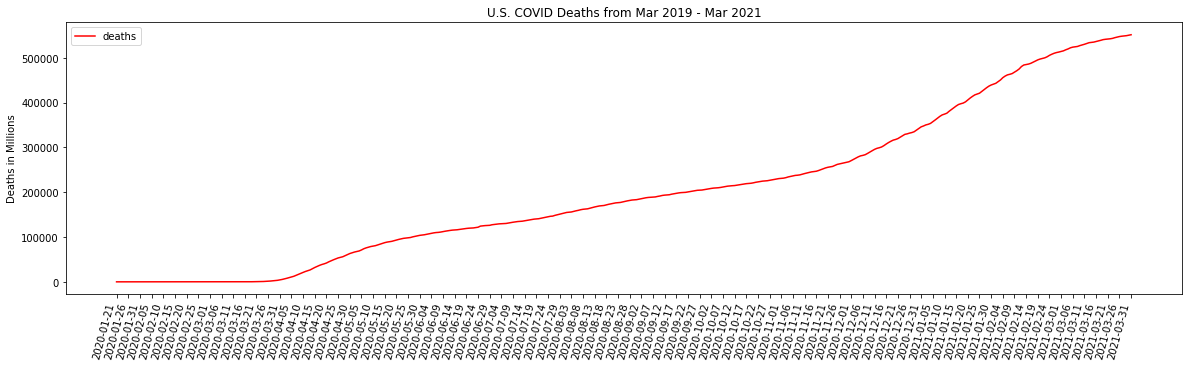

In [ ]:
#plot for deaths vs date
plt.figure(figsize=(20,5))
plt.plot('date', 'deaths', data=df_national_mar20_mar21, color='r')
plt.xticks(df_national_mar20_mar21['date'][::5], rotation=75, ha='right')
plt.ylabel('Deaths in Millions')
plt.legend()
plt.title('U.S. COVID Deaths from Mar 2019 - Mar 2021')
plt.show()

**b) State-Level Data**

In [ ]:
df_state = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")

In [ ]:
df_state.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [ ]:
df_state.tail()

,date,state,fips,cases,deaths
22779,2021-04-20,Virginia,51,648347,10625
22780,2021-04-20,Washington,53,390415,5451
22781,2021-04-20,West Virginia,54,149462,2789
22782,2021-04-20,Wisconsin,55,653091,7427
22783,2021-04-20,Wyoming,56,57456,705


In [ ]:
#check data type and non-null values
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22784 entries, 0 to 22783
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    22784 non-null  object
 1   state   22784 non-null  object
 2   fips    22784 non-null  int64 
 3   cases   22784 non-null  int64 
 4   deaths  22784 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 890.1+ KB


In [ ]:
df_state.to_csv('US_StateLevel_CovidData.csv', index=False)

In [ ]:
#convert date from string to datetime
df_state['date'] = pd.to_datetime(df_state['date'])

**Mar 2019 - Mar 2021**

In [ ]:
df_state_mar20_mar21 = df_state[(df_state['date']>='2019-03-01') & (df_state['date']<='2021-03-31')]

In [ ]:
df_state_mar20_mar21

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
21679,2021-03-31,Virginia,51,618976,10252
21680,2021-03-31,Washington,53,366907,5309
21681,2021-03-31,West Virginia,54,141738,2676
21682,2021-03-31,Wisconsin,55,636250,7316


In [ ]:
#check data type and non-null values
df_state_mar20_mar21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21684 entries, 0 to 21683
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    21684 non-null  datetime64[ns]
 1   state   21684 non-null  object        
 2   fips    21684 non-null  int64         
 3   cases   21684 non-null  int64         
 4   deaths  21684 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1016.4+ KB


In [ ]:
#check missing values
df_state_mar20_mar21.isna().sum()

date      0
state     0
fips      0
cases     0
deaths    0
dtype: int64

In [ ]:
df_group_state = df_state_mar20_mar21.groupby(['state', 'date'])['cases', 'deaths'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df_group_state

cases  deaths
state   date                     
Alabama 2020-03-13      6       0
        2020-03-14     12       0
        2020-03-15     23       0
        2020-03-16     29       0
        2020-03-17     39       0
...                   ...     ...
Wyoming 2021-03-27  56046     695
        2021-03-28  56046     695
        2021-03-29  56190     695
        2021-03-30  56236     695
        2021-03-31  56310     700

[21684 rows x 2 columns]

In [ ]:
#check data for state "Washington" only
df_temp = df_state_mar20_mar21[(df_state_mar20_mar21['state']=='Washington')]

In [ ]:
df_temp

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
4,2020-01-24,Washington,53,1,0
7,2020-01-25,Washington,53,1,0
...,...,...,...,...,...
21460,2021-03-27,Washington,53,363588,5288
21515,2021-03-28,Washington,53,363659,5288
21570,2021-03-29,Washington,53,365029,5296
21625,2021-03-30,Washington,53,365816,5302


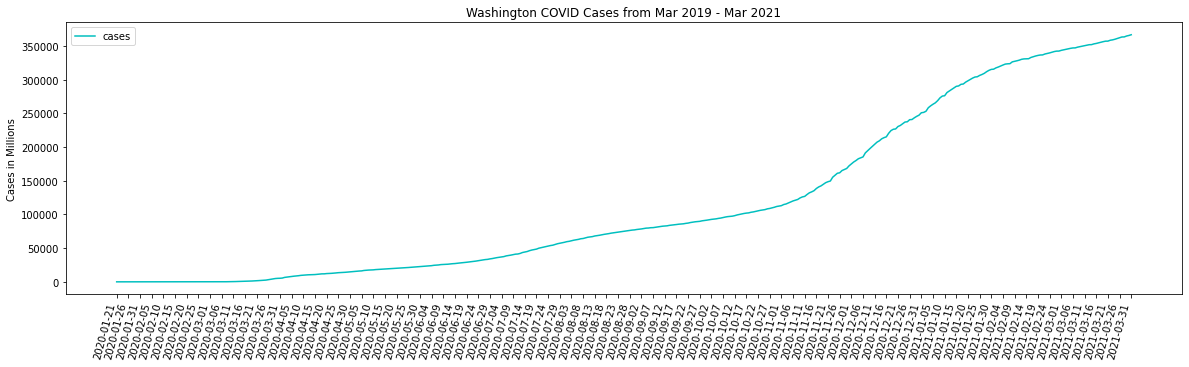

In [ ]:
#plot for Washington COVID Cases
plt.figure(figsize=(20,5))
plt.plot('date', 'cases', data=df_temp, color='c')
plt.xticks(df_temp['date'][::5], rotation=75, ha='right')
plt.ylabel('Cases in Millions')
plt.legend()
plt.title('Washington COVID Cases from Mar 2019 - Mar 2021')
plt.show()

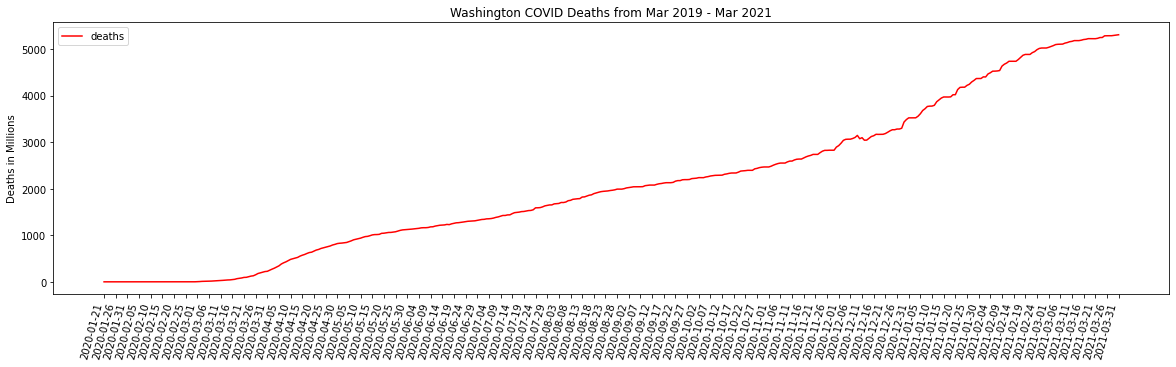

In [ ]:
#plot for Washington COVID deaths
plt.figure(figsize=(20,5))
plt.plot('date', 'deaths', data=df_temp, color='r')
plt.xticks(df_temp['date'][::5], rotation=75, ha='right')
plt.ylabel('Deaths in Millions')
plt.legend()
plt.title('Washington COVID Deaths from Mar 2019 - Mar 2021')
plt.show()

**c) County-Level Data**

In [ ]:
df_county = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

In [ ]:
df_county.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [ ]:
df_county.tail()

,date,county,state,fips,cases,deaths
1241808,2021-04-20,Sweetwater,Wyoming,56037.0,4135,37.0
1241809,2021-04-20,Teton,Wyoming,56039.0,3707,9.0
1241810,2021-04-20,Uinta,Wyoming,56041.0,2155,12.0
1241811,2021-04-20,Washakie,Wyoming,56043.0,897,26.0
1241812,2021-04-20,Weston,Wyoming,56045.0,647,5.0


In [ ]:
#check data type and non-null values
df_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241813 entries, 0 to 1241812
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   date    1241813 non-null  object 
 1   county  1241813 non-null  object 
 2   state   1241813 non-null  object 
 3   fips    1230451 non-null  float64
 4   cases   1241813 non-null  int64  
 5   deaths  1214472 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 56.8+ MB


In [ ]:
#export csv
df_county.to_csv('US_CountyLevel_CovidData.csv', index=False)

In [ ]:
#check missing values
df_county.isna().sum()

date          0
county        0
state         0
fips      11215
cases         0
deaths    26951
dtype: int64

In [ ]:
#check null values in fips column
is_NaN = df_county['fips'].isna()
rows_with_NaN = df_county[is_NaN]

In [ ]:
rows_with_NaN

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0.0
418,2020-03-01,Unknown,Rhode Island,NaN,2,0.0
448,2020-03-02,New York City,New York,NaN,1,0.0
450,2020-03-02,Unknown,Rhode Island,NaN,2,0.0
482,2020-03-03,New York City,New York,NaN,2,0.0
...,...,...,...,...,...,...
1224730,2021-04-15,Unknown,Puerto Rico,NaN,5090,2185.0
1224742,2021-04-15,Unknown,Rhode Island,NaN,13283,20.0
1224943,2021-04-15,Unknown,Tennessee,NaN,9071,119.0
1225230,2021-04-15,Unknown,Utah,NaN,1116,5.0


In [ ]:
#check null values in deaths column
is_NaN = df_county['deaths'].isna()
rows_with_NaN = df_county[is_NaN]

In [ ]:
rows_with_NaN

,date,county,state,fips,cases,deaths
117486,2020-05-05,Adjuntas,Puerto Rico,72001.0,3,NaN
117487,2020-05-05,Aguada,Puerto Rico,72003.0,7,NaN
117488,2020-05-05,Aguadilla,Puerto Rico,72005.0,11,NaN
117489,2020-05-05,Aguas Buenas,Puerto Rico,72007.0,22,NaN
117490,2020-05-05,Aibonito,Puerto Rico,72009.0,13,NaN
...,...,...,...,...,...,...
1224733,2021-04-15,Vega Baja,Puerto Rico,72145.0,3012,NaN
1224734,2021-04-15,Vieques,Puerto Rico,72147.0,202,NaN
1224735,2021-04-15,Villalba,Puerto Rico,72149.0,818,NaN
1224736,2021-04-15,Yabucoa,Puerto Rico,72151.0,1171,NaN


In [ ]:
#check missing values
# df_county.isna().sum()

date      0
county    0
state     0
fips      0
cases     0
deaths    0
dtype: int64

**Mar 2019 - Mar 2021**

In [ ]:
df_county_mar20_mar21 = df_county[(df_county['date']>='2019-03-01') & (df_county['date']<='2021-03-31')]

In [ ]:
df_county_mar20_mar21

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
1176865,2021-03-31,Sweetwater,Wyoming,56037.0,4022,37.0
1176866,2021-03-31,Teton,Wyoming,56039.0,3609,9.0
1176867,2021-03-31,Uinta,Wyoming,56041.0,2128,12.0
1176868,2021-03-31,Washakie,Wyoming,56043.0,890,26.0


In [ ]:
df_county_group_state = df_county_mar20_mar21.groupby(['state', 'date'])['cases', 'deaths'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df_county_group_state

cases  deaths
state   date                     
Alabama 2020-03-13      6     0.0
        2020-03-14     12     0.0
        2020-03-15     23     0.0
        2020-03-16     29     0.0
        2020-03-17     39     0.0
...                   ...     ...
Wyoming 2021-03-27  56046   695.0
        2021-03-28  56046   695.0
        2021-03-29  56190   695.0
        2021-03-30  56236   695.0
        2021-03-31  56310   700.0

[21684 rows x 2 columns]

In [ ]:
#check data for county 'Snohomish'
df_temp_c = df_county_mar20_mar21[(df_county_mar20_mar21['county']=='Snohomish')]

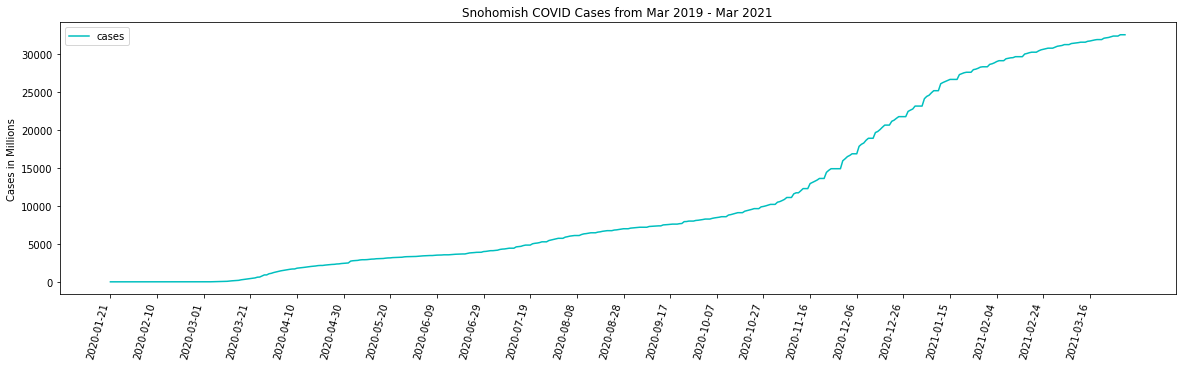

In [ ]:
#plot Snohomish COVID Cases
plt.figure(figsize=(20,5))
plt.plot('date', 'cases', data=df_temp_c, color='c')
plt.xticks(df_temp_c['date'][::20], rotation=75, ha='right')
plt.ylabel('Cases in Millions')
plt.legend()
plt.title('Snohomish COVID Cases from Mar 2019 - Mar 2021')
plt.show()

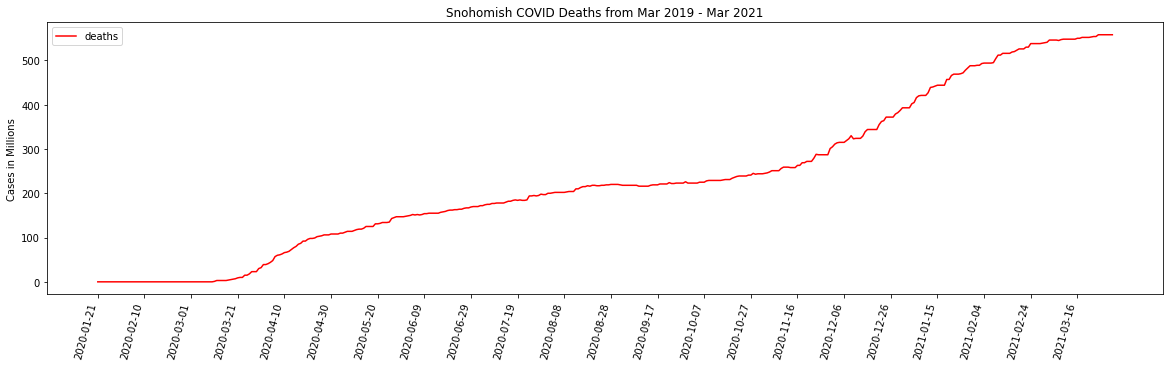

In [ ]:
#plot Snohomish COVID deaths
plt.figure(figsize=(20,5))
plt.plot('date', 'deaths', data=df_temp_c, color='r')
plt.xticks(df_temp_c['date'][::20], rotation=75, ha='right')
plt.ylabel('Cases in Millions')
plt.legend()
plt.title('Snohomish COVID Deaths from Mar 2019 - Mar 2021')
plt.show()

In [ ]:
df_temp_s = df_county_mar20_mar21[(df_county_mar20_mar21['state']=='Washington')]

In [ ]:
# #plot 'cases' and 'deaths' for Washington
# plt.figure(figsize=(20,5))
# df_temp_s["deaths"].plot(style='r');
# df_temp_s["cases"].plot(secondary_y=True, style='c');

Text(0.5, 1.0, 'Washington COVID Cases and Deaths from Mar 2019 - Mar 2021')

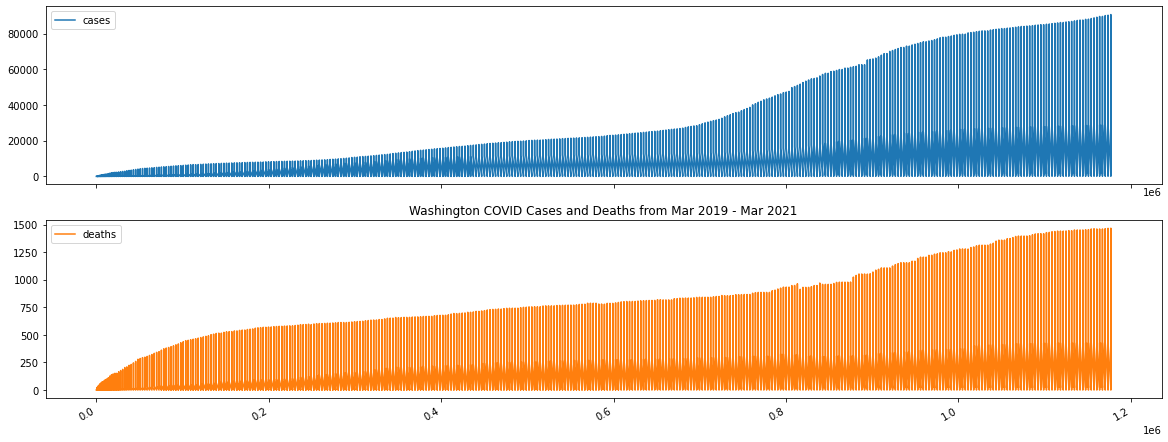

In [ ]:
#plot 'cases' and 'deaths' for Washington
Cases_deaths = ['cases', 'deaths']
df_temp_s[Cases_deaths].plot(subplots=True, figsize=(20, 8))
plt.title('Washington COVID Cases and Deaths from Mar 2019 - Mar 2021')

**US Counties recent**

In [ ]:
df_county_recent = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-recent.csv")

In [ ]:
df_county_recent.head()

,date,county,state,fips,cases,deaths
0,2021-03-22,Autauga,Alabama,1001.0,6517,98.0
1,2021-03-22,Baldwin,Alabama,1003.0,20361,296.0
2,2021-03-22,Barbour,Alabama,1005.0,2213,54.0
3,2021-03-22,Bibb,Alabama,1007.0,2529,58.0
4,2021-03-22,Blount,Alabama,1009.0,6387,130.0


In [ ]:
df_county_recent.tail()

,date,county,state,fips,cases,deaths
97412,2021-04-20,Sweetwater,Wyoming,56037.0,4135,37.0
97413,2021-04-20,Teton,Wyoming,56039.0,3707,9.0
97414,2021-04-20,Uinta,Wyoming,56041.0,2155,12.0
97415,2021-04-20,Washakie,Wyoming,56043.0,897,26.0
97416,2021-04-20,Weston,Wyoming,56045.0,647,5.0


In [ ]:
#check data type and non-null values
df_county_recent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97417 entries, 0 to 97416
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    97417 non-null  object 
 1   county  97417 non-null  object 
 2   state   97417 non-null  object 
 3   fips    96540 non-null  float64
 4   cases   97417 non-null  int64  
 5   deaths  95077 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.5+ MB


In [ ]:
#export csv
df_county_recent.to_csv('US_CountyLevelRecent_CovidData.csv', index=False)

In [ ]:
#check missing values
df_county_recent.isna().sum()

date         0
county       0
state        0
fips       874
cases        0
deaths    2340
dtype: int64

In [ ]:
#check null values in fips column
is_NaN = df_county_recent['fips'].isna()
rows_with_NaN = df_county_recent[is_NaN]

In [ ]:
rows_with_NaN

,date,county,state,fips,cases,deaths
90,2021-03-17,Unknown,Alaska,NaN,261,0.0
180,2021-03-17,Unknown,Arkansas,NaN,3221,0.0
315,2021-03-17,Unknown,Connecticut,NaN,1035,9.0
320,2021-03-17,Unknown,Delaware,NaN,199,0.0
385,2021-03-17,Unknown,Florida,NaN,3516,0.0
...,...,...,...,...,...,...
96568,2021-04-15,Unknown,Puerto Rico,NaN,5090,2185.0
96580,2021-04-15,Unknown,Rhode Island,NaN,13283,20.0
96781,2021-04-15,Unknown,Tennessee,NaN,9071,119.0
97068,2021-04-15,Unknown,Utah,NaN,1116,5.0


In [ ]:
#check null values in deaths column
is_NaN = df_county_recent['deaths'].isna()
rows_with_NaN = df_county_recent[is_NaN]

In [ ]:
rows_with_NaN

,date,county,state,fips,cases,deaths
2330,2021-03-17,Adjuntas,Puerto Rico,72001.0,469,NaN
2331,2021-03-17,Aguada,Puerto Rico,72003.0,1241,NaN
2332,2021-03-17,Aguadilla,Puerto Rico,72005.0,1558,NaN
2333,2021-03-17,Aguas Buenas,Puerto Rico,72007.0,1051,NaN
2334,2021-03-17,Aibonito,Puerto Rico,72009.0,600,NaN
...,...,...,...,...,...,...
96571,2021-04-15,Vega Baja,Puerto Rico,72145.0,3012,NaN
96572,2021-04-15,Vieques,Puerto Rico,72147.0,202,NaN
96573,2021-04-15,Villalba,Puerto Rico,72149.0,818,NaN
96574,2021-04-15,Yabucoa,Puerto Rico,72151.0,1171,NaN


In [ ]:
#check missing values
# df_county_recent.isna().sum()

date      0
county    0
state     0
fips      0
cases     0
deaths    0
dtype: int64

In [ ]:
# df_county_recent.dtypes

date      datetime64[ns]
county            object
state             object
fips              object
cases              int64
deaths            object
dtype: object

**Mar 2019 - Mar 2021**

In [ ]:
df_countyRecent_mar20_mar21 = df_county_recent[(df_county_recent['date']>='2019-03-01') & (df_county_recent['date']<='2021-03-31')]

In [ ]:
df_countyRecent_mar20_mar21

,date,county,state,fips,cases,deaths
0,2021-03-17,Autauga,Alabama,1001.0,6483,96.0
1,2021-03-17,Baldwin,Alabama,1003.0,20263,295.0
2,2021-03-17,Barbour,Alabama,1005.0,2199,54.0
3,2021-03-17,Bibb,Alabama,1007.0,2512,58.0
4,2021-03-17,Blount,Alabama,1009.0,6371,129.0
...,...,...,...,...,...,...
48703,2021-03-31,Sweetwater,Wyoming,56037.0,4022,37.0
48704,2021-03-31,Teton,Wyoming,56039.0,3609,9.0
48705,2021-03-31,Uinta,Wyoming,56041.0,2128,12.0
48706,2021-03-31,Washakie,Wyoming,56043.0,890,26.0


In [ ]:
df_countyRecent_group_state = df_countyRecent_mar20_mar21.groupby(['state', 'date'])['cases', 'deaths'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df_countyRecent_group_state

cases   deaths
state   date                       
Alabama 2021-03-17  509476  10363.0
        2021-03-18  510048  10391.0
        2021-03-19  510579  10425.0
        2021-03-20  511087  10436.0
        2021-03-21  511460  10436.0
...                    ...      ...
Wyoming 2021-03-27   56046    695.0
        2021-03-28   56046    695.0
        2021-03-29   56190    695.0
        2021-03-30   56236    695.0
        2021-03-31   56310    700.0

[825 rows x 2 columns]

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
pd.options.mode.chained_assignment = None

In [ ]:
cumulative_df = df_countyRecent_mar20_mar21.groupby('date')['cases', 'deaths'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
cumulative_df

,date,cases,deaths
0,2021-03-17,29632723,537649.0
1,2021-03-18,29693583,539207.0
2,2021-03-19,29754181,540720.0
3,2021-03-20,29808812,541493.0
4,2021-03-21,29843049,541937.0
5,2021-03-22,29897707,542587.0
6,2021-03-23,29954506,543479.0
7,2021-03-24,30034341,545070.0
8,2021-03-25,30103835,546340.0
9,2021-03-26,30178591,547600.0


In [ ]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

In [ ]:
from plotly.offline import iplot
import plotly.graph_objs as go

In [ ]:
enable_plotly_in_cell()

### Plot for number of cumulative covid cases over time
fig = px.bar(cumulative_df, x="date", y="cases")
layout = go.Layout(
    title=go.layout.Title(
        text="Daily cumulative count of COVID-19 cases in US",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
    xaxis_title = "Date of observation",
    yaxis_title = "Number of cases"
)

fig.update_layout(layout)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
enable_plotly_in_cell()

### Plot for number of cumulative covid deaths over time
fig = px.bar(cumulative_df, x="date", y="deaths")
layout = go.Layout(
    title=go.layout.Title(
        text="Daily cumulative count of COVID-19 deaths in US",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
    xaxis_title = "Date of observation",
    yaxis_title = "Number of deaths"
)

fig.update_layout(layout)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#by state
# import datetime
# enable_plotly_in_cell()

# cumulative_df1 = df_countyRecent_mar20_mar21.groupby(["state", "date"])["cases", "deaths"].sum().reset_index()
# cumulative_df1["date"] = pd.to_datetime(cumulative_df1["date"] , format="%m/%d/%Y").dt.date
# cumulative_df1 = cumulative_df1.sort_values(by="date").reset_index(drop=True)
# start_date = datetime.date(2020, 3, 1)
# cumulative_df1 = cumulative_df1[cumulative_df1["date"]>=start_date]
# cumulative_df1["date"] = cumulative_df1["date"].astype(str)

# fig = px.choropleth(locations=cumulative_df1["state"],
#                     color=cumulative_df1["cases"], 
#                     locationmode="USA-states",
#                     scope="usa",
#                     animation_frame=cumulative_df1["date"],
#                     color_continuous_scale='Reds',
#                     range_color=[0,600000]
#                     #autocolorscale=False,
#                    )

# layout = go.Layout(
#     title=go.layout.Title(
#         text="Cumulative count of COVID-19 cases in US states",
#         x=0.5
#     ),
#     font=dict(size=14),
# )

# fig.update_layout(layout)
# fig.show()

# **Excess Deaths During the Coronavirus Pandemic**
Data that documents the number of **deaths from all causes** that have occurred during the coronavirus pandemic for 32 countries.

**Country and City-Level Data**

The deaths fields have the following definitions:

* **deaths:** The total number of confirmed deaths recorded from any cause.
* **expected_deaths:** The baseline number of expected deaths, calculated from a historical average.
* **excess_deaths:** The number of deaths minus the expected deaths.

The time fields have the following definitions:

* **frequency:** Weekly or monthly, depending on how the data is recorded.
* **start_date:** The first date included in the period.
* **end_date:** The last date included in the period.
* **month:** Numerical month.
* **week:** Epidemiological week, which is a standardized way of counting weeks to allow for year-over-year comparisons. Most countries start epi weeks on Mondays, but others vary.
* **baseline:** The years used to calculate expected_deaths.


In [ ]:
df_excess_deaths = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/excess-deaths/deaths.csv")

In [ ]:
df_excess_deaths.head()

,country,placename,frequency,start_date,end_date,year,month,week,deaths,expected_deaths,excess_deaths,baseline
0,Austria,NaN,weekly,2020-01-06,2020-01-12,2020,1,2.0,1702,1806.0,-104.0,2015-2019 historical data
1,Austria,NaN,weekly,2020-01-13,2020-01-19,2020,1,3.0,1797,1819.0,-22.0,2015-2019 historical data
2,Austria,NaN,weekly,2020-01-20,2020-01-26,2020,1,4.0,1779,1831.0,-52.0,2015-2019 historical data
3,Austria,NaN,weekly,2020-01-27,2020-02-02,2020,2,5.0,1947,1837.0,110.0,2015-2019 historical data
4,Austria,NaN,weekly,2020-02-03,2020-02-09,2020,2,6.0,1681,1837.0,-156.0,2015-2019 historical data


In [ ]:
df_excess_deaths.tail()

,country,placename,frequency,start_date,end_date,year,month,week,deaths,expected_deaths,excess_deaths,baseline
7253,United States,NaN,weekly,NaN,NaN,2017-2019 average,12,48.0,56481,NaN,NaN,NaN
7254,United States,NaN,weekly,NaN,NaN,2017-2019 average,12,49.0,57420,NaN,NaN,NaN
7255,United States,NaN,weekly,NaN,NaN,2017-2019 average,12,50.0,58449,NaN,NaN,NaN
7256,United States,NaN,weekly,NaN,NaN,2017-2019 average,12,51.0,59473,NaN,NaN,NaN
7257,United States,NaN,weekly,NaN,NaN,2017-2019 average,12,52.0,60391,NaN,NaN,NaN


In [ ]:
#check data type and non-null values
df_excess_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7258 entries, 0 to 7257
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          7258 non-null   object 
 1   placename        375 non-null    object 
 2   frequency        7258 non-null   object 
 3   start_date       6490 non-null   object 
 4   end_date         6490 non-null   object 
 5   year             7258 non-null   object 
 6   month            7258 non-null   int64  
 7   week             6592 non-null   float64
 8   deaths           7258 non-null   int64  
 9   expected_deaths  1268 non-null   float64
 10  excess_deaths    1268 non-null   float64
 11  baseline         1268 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 680.6+ KB


In [ ]:
rslt_df = df_excess_deaths[df_excess_deaths['country'] == "United States"] 

In [ ]:
rslt_df.head()

,country,placename,frequency,start_date,end_date,year,month,week,deaths,expected_deaths,excess_deaths,baseline
7157,United States,NaN,weekly,2020-01-06,2020-01-12,2020,1,2.0,60710,60757.0,-47.0,2015-2019 historical data
7158,United States,NaN,weekly,2020-01-13,2020-01-19,2020,1,3.0,59360,60179.0,-819.0,2015-2019 historical data
7159,United States,NaN,weekly,2020-01-20,2020-01-26,2020,1,4.0,59140,60064.0,-924.0,2015-2019 historical data
7160,United States,NaN,weekly,2020-01-27,2020-02-02,2020,2,5.0,58800,60821.0,-2021.0,2015-2019 historical data
7161,United States,NaN,weekly,2020-02-03,2020-02-09,2020,2,6.0,59380,60545.0,-1165.0,2015-2019 historical data


In [ ]:
rslt_df.tail()

,country,placename,frequency,start_date,end_date,year,month,week,deaths,expected_deaths,excess_deaths,baseline
7253,United States,NaN,weekly,NaN,NaN,2017-2019 average,12,48.0,56481,NaN,NaN,NaN
7254,United States,NaN,weekly,NaN,NaN,2017-2019 average,12,49.0,57420,NaN,NaN,NaN
7255,United States,NaN,weekly,NaN,NaN,2017-2019 average,12,50.0,58449,NaN,NaN,NaN
7256,United States,NaN,weekly,NaN,NaN,2017-2019 average,12,51.0,59473,NaN,NaN,NaN
7257,United States,NaN,weekly,NaN,NaN,2017-2019 average,12,52.0,60391,NaN,NaN,NaN


In [ ]:
rslt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 7157 to 7257
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          101 non-null    object 
 1   placename        0 non-null      object 
 2   frequency        101 non-null    object 
 3   start_date       50 non-null     object 
 4   end_date         50 non-null     object 
 5   year             101 non-null    object 
 6   month            101 non-null    int64  
 7   week             101 non-null    float64
 8   deaths           101 non-null    int64  
 9   expected_deaths  50 non-null     float64
 10  excess_deaths    50 non-null     float64
 11  baseline         50 non-null     object 
dtypes: float64(3), int64(2), object(7)
memory usage: 10.3+ KB


In [ ]:
new_df = rslt_df.drop(['placename'], axis = 1)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 7157 to 7257
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          101 non-null    object 
 1   frequency        101 non-null    object 
 2   start_date       50 non-null     object 
 3   end_date         50 non-null     object 
 4   year             101 non-null    object 
 5   month            101 non-null    int64  
 6   week             101 non-null    float64
 7   deaths           101 non-null    int64  
 8   expected_deaths  50 non-null     float64
 9   excess_deaths    50 non-null     float64
 10  baseline         50 non-null     object 
dtypes: float64(3), int64(2), object(6)
memory usage: 9.5+ KB


In [ ]:
new_df.tail(52)

,country,frequency,start_date,end_date,year,month,week,deaths,expected_deaths,excess_deaths,baseline
7206,United States,weekly,2020-12-14,2020-12-20,2020,12,51.0,65948,59473.0,6475.0,2015-2019 historical data
7207,United States,weekly,NaN,NaN,2017-2019 average,1,2.0,60803,NaN,NaN,NaN
7208,United States,weekly,NaN,NaN,2017-2019 average,1,3.0,60997,NaN,NaN,NaN
7209,United States,weekly,NaN,NaN,2017-2019 average,1,4.0,60988,NaN,NaN,NaN
7210,United States,weekly,NaN,NaN,2017-2019 average,2,5.0,60821,NaN,NaN,NaN
7211,United States,weekly,NaN,NaN,2017-2019 average,2,6.0,60545,NaN,NaN,NaN
7212,United States,weekly,NaN,NaN,2017-2019 average,2,7.0,60206,NaN,NaN,NaN
7213,United States,weekly,NaN,NaN,2017-2019 average,2,8.0,59837,NaN,NaN,NaN
7214,United States,weekly,NaN,NaN,2017-2019 average,3,9.0,59440,NaN,NaN,NaN
7215,United States,weekly,NaN,NaN,2017-2019 average,3,10.0,59014,NaN,NaN,NaN


In [ ]:
#drop rows with null values
new_df = new_df.dropna()

In [ ]:
new_df = new_df.reset_index(drop = True)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          50 non-null     object 
 1   frequency        50 non-null     object 
 2   start_date       50 non-null     object 
 3   end_date         50 non-null     object 
 4   year             50 non-null     object 
 5   month            50 non-null     int64  
 6   week             50 non-null     float64
 7   deaths           50 non-null     int64  
 8   expected_deaths  50 non-null     float64
 9   excess_deaths    50 non-null     float64
 10  baseline         50 non-null     object 
dtypes: float64(3), int64(2), object(6)
memory usage: 4.4+ KB


In [ ]:
new_df.tail(20)

,country,frequency,start_date,end_date,year,month,week,deaths,expected_deaths,excess_deaths,baseline
30,United States,weekly,2020-08-03,2020-08-09,2020,8,32.0,63939,52364.0,11575.0,2015-2019 historical data
31,United States,weekly,2020-08-10,2020-08-16,2020,8,33.0,63864,52276.0,11588.0,2015-2019 historical data
32,United States,weekly,2020-08-17,2020-08-23,2020,8,34.0,62700,52246.0,10454.0,2015-2019 historical data
33,United States,weekly,2020-08-24,2020-08-30,2020,8,35.0,61153,52300.0,8853.0,2015-2019 historical data
34,United States,weekly,2020-08-31,2020-09-06,2020,9,36.0,60050,52467.0,7583.0,2015-2019 historical data
35,United States,weekly,2020-09-07,2020-09-13,2020,9,37.0,59227,52747.0,6480.0,2015-2019 historical data
36,United States,weekly,2020-09-14,2020-09-20,2020,9,38.0,59242,53100.0,6142.0,2015-2019 historical data
37,United States,weekly,2020-09-21,2020-09-27,2020,9,39.0,59897,53484.0,6413.0,2015-2019 historical data
38,United States,weekly,2020-09-28,2020-10-04,2020,10,40.0,58652,53858.0,4794.0,2015-2019 historical data
39,United States,weekly,2020-10-05,2020-10-11,2020,10,41.0,60277,54178.0,6099.0,2015-2019 historical data


In [ ]:
new_df.to_csv('US_ExcessDeaths_ByAllCauses.csv', index=False)

In [ ]:
#export csv for all countries
# df_excess_deaths.to_csv('ExcessDeaths_ByAllCauses_32CountriesData.csv', index=False)

In [ ]:
#check missing values
df_excess_deaths.isna().sum()

country               0
placename          6883
frequency             0
start_date          768
end_date            768
year                  0
month                 0
week                666
deaths                0
expected_deaths    5990
excess_deaths      5990
baseline           5990
dtype: int64

In [ ]:
 cp = df_excess_deaths.groupby(['country'])

In [ ]:
#print the first value in each group
cp.first()

,placename,frequency,start_date,end_date,year,month,week,deaths,expected_deaths,excess_deaths,baseline
country,,,,,,,,,,,
Austria,None,weekly,2020-01-06,2020-01-12,2020,1,2.0,1702,1806.0,-104.0,2015-2019 historical data
Belgium,None,weekly,2015-01-05,2015-01-11,2015,1,2.0,2525,2386.0,-5.0,2016-2019 historical data
Bolivia,None,monthly,None,None,2016,1,NaN,4538,4593.0,212.0,2016-2019 historical data
Brazil,None,weekly,2019-01-06,2019-01-12,2015-2019 average,1,2.0,20970,20970.0,2204.0,2015-2019 historical data
Chile,None,weekly,2015-01-05,2015-01-11,2015,1,2.0,1888,2004.0,114.0,2015-2019 historical data
Colombia,None,weekly,2015-01-05,2015-01-11,2015,1,2.0,4588,4959.0,17.0,2015-2019 historical data
Czech Republic,None,weekly,2020-01-06,2020-01-12,2020,1,2.0,2321,2349.0,-28.0,2015-2019 historical data
Denmark,None,weekly,2020-01-06,2020-01-12,2020,1,2.0,1149,1120.0,29.0,2015-2019 historical data
Ecuador,None,monthly,None,None,2020,1,NaN,6692,6423.0,269.0,2017-2019 historical data


#**Tracking Covid-19 at U.S. Colleges and Universities**
Counts of Covid-19 cases reported on college and university campuses in the United States.

The fields have the following definitions:

* **date:** The date of the last update.
* **state:** The state where the college is located.
* **county:** The county where the college is located.
* **city:** The city where the college is located.
* **ipeds_id:** The Integrated Postsecondary Education Data System (IPEDS) ID number for the college.
* **college:** The name of the college or university.
* **cases:** The total number of reported Covid-19 cases among university students and employees in all fields, including those whose roles as doctors, nurses, pharmacists or medical students put them at higher risk of contracting the virus, since the beginning of the pandemic.
* **cases_2021:** The total number of newly reported Covid-19 cases since Jan. 1, 2021 only. notes: Specific methodological notes that apply to the institution, for example if the count includes cases from a medical unit, and if there is a possibility that duplicate cases have been counted due to the manner in which the institution reports data.

Colleges and universities that have reported zero cases will be listed with a zero for cases, while colleges which have not reported data will have a blank in the cases field.

In [ ]:
df_uni = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/colleges/colleges.csv")

In [ ]:
df_uni.head()

,date,state,county,city,ipeds_id,college,cases,cases_2021,notes
0,2021-04-28,Alabama,Madison,Huntsville,100654,Alabama A&M University,41,NaN,NaN
1,2021-04-28,Alabama,Montgomery,Montgomery,100724,Alabama State University,2,NaN,NaN
2,2021-04-28,Alabama,Limestone,Athens,100812,Athens State University,45,10.0,NaN
3,2021-04-28,Alabama,Lee,Auburn,100858,Auburn University,2726,551.0,NaN
4,2021-04-28,Alabama,Montgomery,Montgomery,100830,Auburn University at Montgomery,214,74.0,NaN


In [ ]:
#check data type and non-null values
df_uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1949 non-null   object 
 1   state       1949 non-null   object 
 2   county      1947 non-null   object 
 3   city        1949 non-null   object 
 4   ipeds_id    1949 non-null   object 
 5   college     1949 non-null   object 
 6   cases       1949 non-null   int64  
 7   cases_2021  1585 non-null   float64
 8   notes       42 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 137.2+ KB


In [ ]:
#export csv
df_uni.to_csv('US_UnivColleges_CovidData.csv', index=False)

In [ ]:
#check missing values
df_uni.isna().sum()

date             0
state            0
county           2
city             0
ipeds_id         0
college          0
cases            0
cases_2021     441
notes         1889
dtype: int64

**Mar 2019 - Mar 2021**

In [ ]:
df_uni_mar20_mar21 = df_uni[(df_uni['date']>='2019-03-01') & (df_uni['date']<='2021-03-31')]

In [ ]:
df_uni_mar20_mar21 

,date,state,county,city,ipeds_id,college,cases,cases_2021,notes
0,2021-02-26,Alabama,Madison,Huntsville,100654,Alabama A&M University,41,NaN,NaN
1,2021-02-26,Alabama,Montgomery,Montgomery,100724,Alabama State University,2,NaN,NaN
2,2021-02-26,Alabama,Limestone,Athens,100812,Athens State University,45,10.0,NaN
3,2021-02-26,Alabama,Lee,Auburn,100858,Auburn University,2499,324.0,NaN
4,2021-02-26,Alabama,Montgomery,Montgomery,100830,Auburn University at Montgomery,214,74.0,NaN
...,...,...,...,...,...,...,...,...,...
1944,2021-02-26,Wisconsin,Milwaukee,Milwaukee,240338,Wisconsin Lutheran College,122,2.0,NaN
1945,2021-02-26,Wyoming,Natrona,Casper,240505,Casper College,363,33.0,NaN
1946,2021-02-26,Wyoming,Goshen,Torrington,240596,Eastern Wyoming College,13,1.0,NaN
1947,2021-02-26,Wyoming,Albany,Laramie,240727,University of Wyoming,1970,175.0,NaN


In [ ]:
df_uni_mar20_mar21['date'].unique()

array(['2021-02-26'], dtype=object)

In [ ]:
cumulative_df = df_uni_mar20_mar21.groupby('state')['cases'].sum().reset_index()

In [ ]:
cumulative_df

,state,cases
0,Alabama,14650
1,Alaska,145
2,American Samoa,0
3,Arizona,14878
4,Arkansas,9164
5,California,17377
6,Colorado,10907
7,Connecticut,5585
8,Delaware,1466
9,Florida,28704


**ny ABSTRACTS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("drive/MyDrive/ny_keywords_combined.csv") 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111214 entries, 0 to 111213
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   date           111214 non-null  object
 1   abstract       110581 non-null  object
 2   keywords       100767 non-null  object
 3   doc_type       111214 non-null  object
 4   material_type  107332 non-null  object
 5   news_desk      109287 non-null  object
dtypes: object(6)
memory usage: 5.1+ MB


In [ ]:
df_new = df.fillna('NA')

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111214 entries, 0 to 111213
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   date           111214 non-null  object
 1   abstract       111214 non-null  object
 2   keywords       111214 non-null  object
 3   doc_type       111214 non-null  object
 4   material_type  111214 non-null  object
 5   news_desk      111214 non-null  object
dtypes: object(6)
memory usage: 5.1+ MB


In [ ]:
df_new['keywords']

0         ['Murders, Attempted Murders and Homicides', '...
1                                                        NA
2         ['Commencement Speeches', 'Colleges and Univer...
3                               ['Coronavirus (2019-nCoV)']
4                                     ['Crossword Puzzles']
                                ...                        
111209                      ['Baseball', 'Trades (Sports)']
111210    ['United States Politics and Government', 'Rus...
111211    ['Presidential Election of 2020', 'George Floy...
111212    ['Education (K-12)', 'Coronavirus Reopenings',...
111213    ['Amnesties, Commutations and Pardons', 'Polit...
Name: keywords, Length: 111214, dtype: object

In [ ]:
df_new.to_csv('ny_keywords_clean.csv', index=False)

* removed abstract with duplicate values
* took unique abstracts

In [ ]:
df_unq = pd.read_csv("drive/MyDrive/ny_unique_data.csv") 

In [ ]:
df_unq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109252 entries, 0 to 109251
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   date           109252 non-null  object
 1   abstract       109165 non-null  object
 2   keywords       99062 non-null   object
 3   doc_type       109252 non-null  object
 4   material_type  106982 non-null  object
 5   news_desk      107337 non-null  object
dtypes: object(6)
memory usage: 5.0+ MB


In [ ]:
df_unq.isnull().sum()

date                 0
abstract            87
keywords         10190
doc_type             0
material_type     2270
news_desk         1915
dtype: int64

In [ ]:
df_unq.head(20)

,date,abstract,keywords,doc_type,material_type,news_desk
0,5/1/20,The police said they had classified the deaths...,"['Murders, Attempted Murders and Homicides', '...",article,News,Express
1,5/1/20,"Fiona Apple blows our minds, again.",NaN,article,News,Podcasts
2,5/1/20,Oprah Winfrey will give a virtual commencement...,"['Commencement Speeches', 'Colleges and Univer...",article,News,Express
3,5/1/20,Public beaches have become a flashpoint as the...,['Coronavirus (2019-nCoV)'],article,briefing,NYTNow
4,5/1/20,Trenton Charlson raises the curtain on our sol...,['Crossword Puzzles'],article,News,Games
5,5/1/20,"The project, announced by the C.D.C., will hel...","['Genetics and Heredity', 'Coronavirus (2019-n...",article,News,Investigative
6,5/1/20,"Corrections that appeared in print on Friday, ...",NaN,article,Correction,Corrections
7,5/1/20,"Quotation of the Day for Friday, May 1, 2020.",NaN,article,Quote,Summary
8,5/1/20,She didn‚Äôt want to go to Burning Man (for al...,"['Love (Emotion)', 'Marriages', 'Burning Man F...",article,News,Styles
9,5/1/20,The latest on stock market and business news d...,"['United States Economy', 'Coronavirus (2019-n...",article,News,Business


In [ ]:
df_unq["date"] = pd.to_datetime(df_unq["date"]).dt.strftime('%Y-%m-%d')

In [ ]:
df_unq.head()

,date,abstract,keywords,doc_type,material_type,news_desk
0,2020-05-01,The police said they had classified the deaths...,"['Murders, Attempted Murders and Homicides', '...",article,News,Express
1,2020-05-01,"Fiona Apple blows our minds, again.",NaN,article,News,Podcasts
2,2020-05-01,Oprah Winfrey will give a virtual commencement...,"['Commencement Speeches', 'Colleges and Univer...",article,News,Express
3,2020-05-01,Public beaches have become a flashpoint as the...,['Coronavirus (2019-nCoV)'],article,briefing,NYTNow
4,2020-05-01,Trenton Charlson raises the curtain on our sol...,['Crossword Puzzles'],article,News,Games


In [ ]:
df_unq.to_csv('ny_articles.csv', index=False)